## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Loading data

In [2]:
data = pd.read_csv("https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv")

## Exploring the data

In [3]:
data.head(7)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
5,Water For Elephants,Drama,20th Century Fox,72,3.081421,60,$117.09,2011
6,WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008


In [4]:
data.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [5]:
print(data.dtypes, "Shape of data is", data.shape)

Film                  object
Genre                 object
Lead Studio           object
Audience score %       int64
Profitability        float64
Rotten Tomatoes %      int64
Worldwide Gross       object
Year                   int64
dtype: object Shape of data is (77, 8)


In [6]:
data.describe()

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.000000,77.000000,77.000000,77.000000
mean,63.727273,4.599483,46.701299,2009.077922
std,13.657113,8.031990,26.095001,1.354974
min,35.000000,0.000000,3.000000,2007.000000
25%,52.000000,1.751351,26.000000,2008.000000
50%,64.000000,2.642353,45.000000,2009.000000
75%,76.000000,5.103117,64.000000,2010.000000
max,89.000000,66.934000,96.000000,2011.000000


In [7]:
data.isnull().sum()

Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

# Description of data:

We have table of movies and detailed info on their different scores(Audience and Rotten Tomatoes), genre and by which studio and when the movie produced. The size of table is not large (77 rows and 8 columns) and does not contain any 'NULL' values.

 ## 3) How many movies are there in the dataset in total?

In [47]:
data['Film'].drop_duplicates().count()

75

## 4) How many movies are there in the dataset for each year?

In [49]:
data['Film'].drop_duplicates().groupby(data['Year']).count()

Year
2007    11
2008    19
2009    12
2010    20
2011    13
Name: Film, dtype: int64

## 5) Show the details of the least and most profitable movies in the dataset.

### Most profitable top 10:

In [10]:
data.sort_values(['Profitability'], ascending=False).head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
68,Fireproof,Drama,Independent,51,66.934000,40,$33.47,2008
60,High School Musical 3: Senior Year,Comedy,Disney,76,22.913136,65,$252.04,2008
14,The Twilight Saga: New Moon,Drama,Summit,78,14.196400,27,$709.82,2009
7,Waitress,Romance,Independent,67,11.089742,89,$22.18,2007
12,Twilight,Romance,Summit,82,10.180027,49,$376.66,2008
45,Mamma Mia!,Comedy,Universal,76,9.234454,53,$609.47,2008
46,Mamma Mia!,Comedy,Universal,76,9.234454,53,$609.47,2008
43,Midnight in Paris,Romence,Sony,84,8.744706,93,$148.66,2011
76,(500) Days of Summer,comedy,Fox,81,8.096000,87,$60.72,2009
16,The Proposal,Comedy,Disney,74,7.867500,43,$314.70,2009


### Least profitable top 10:

In [50]:
data.sort_values(['Profitability'], ascending=True).head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
33,Our Family Wedding,Comedy,Independent,49,0.000000,14,$21.37,2010
57,Jane Eyre,Romance,Universal,77,0.000000,85,$30.15,2011
8,Waiting For Forever,Romance,Independent,53,0.005000,6,$0.03,2011
42,Miss Pettigrew Lives for a Day,Comedy,Independent,70,0.252895,78,$15.17,2008
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
72,Across the Universe,Romance,Independent,84,0.652603,54,$29.37,2007
39,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,$8.26,2011
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010


## 6) The ‘Genre’ value seems to be inconsistent at times; try to find these inconsistenciesand fix them.

In [11]:
data['Genre'].unique()

array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Romence',
       'Comdy', 'Action', 'romance', 'comedy'], dtype=object)

 With quick look to "Genre" column (unique values), we see that there are inconsistencies in categorical values such as "comedy", "Comdy" "romance" 

Let's replace them:

In [12]:
data["Genre"].replace(["Comdy","comedy"], "Comedy", inplace=True)
data["Genre"].replace(["Romence", "romance"], "Romance", inplace=True)



In [13]:
data['Genre'].unique()

array(['Romance', 'Comedy', 'Drama', 'Animation', 'Fantasy', 'Action'],
      dtype=object)

## 7. Save (to a new CSV file) the top 10 comedies by audience score; show only moviename, year, and lead studio.

In [14]:
filterdata = data.loc[(data['Genre'] == 'Comedy')].sort_values('Audience score %', ascending=False)
newdf = filterdata[["Film","Year","Lead Studio"]].head(10)
newdf.to_csv(os.getcwd()+'\\top10comedyfilm.csv', index=False)

newdf

,Film,Year,Lead Studio
54,Knocked Up,2007,Universal
76,(500) Days of Summer,2009,Fox
27,Sex and the City,2008,Warner Bros.
71,Beginners,2011,Independent
69,Enchanted,2007,Disney
44,Marley and Me,2008,Fox
60,High School Musical 3: Senior Year,2008,Disney
46,Mamma Mia!,2008,Universal
45,Mamma Mia!,2008,Universal
30,Penelope,2008,Summit


# Visualizations

## First dataset (Titanic)

In [15]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")

In [16]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


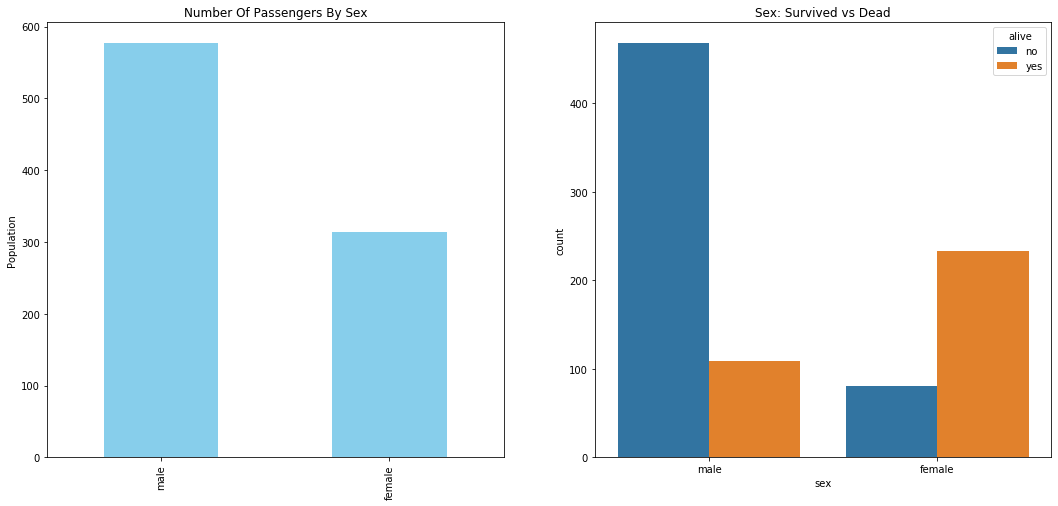

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
df_titanic["sex"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_title("Number Of Passengers By Sex")
ax[0].set_ylabel("Population")
sns.countplot("sex", hue = "alive", data = df_titanic, ax = ax[1])
ax[1].set_title("Sex: Survived vs Dead")
plt.show()

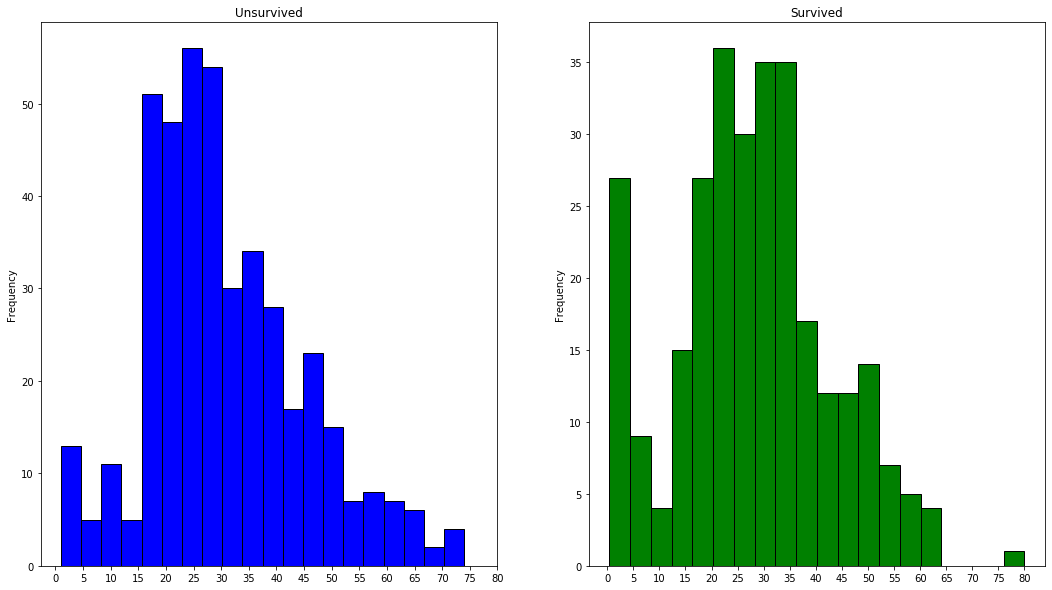

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (18, 10))
df_titanic[df_titanic["alive"] == 'no']["age"].plot.hist(ax = ax[0], bins = 20, edgecolor = "black", color = "blue")
ax[0].set_title("Unsurvived")
domain_1 = list(range(0, 85, 5))
ax[0].set_xticks(domain_1)
df_titanic[df_titanic["alive"] == 'yes']["age"].plot.hist(ax = ax[1], bins = 20, edgecolor = "black", color = "green")
ax[1].set_title("Survived")
domain_2 = list(range(0, 85, 5))
ax[1].set_xticks(domain_2)
plt.show()

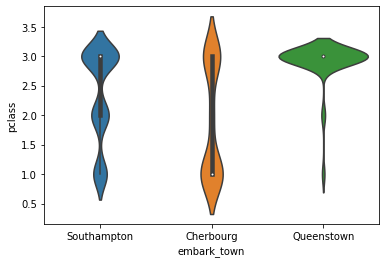

In [19]:
ax = sns.violinplot(x="embark_town", y="pclass", data=df_titanic)


## Second dataset (mpg)

In [20]:
df_mpg = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")

In [21]:
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


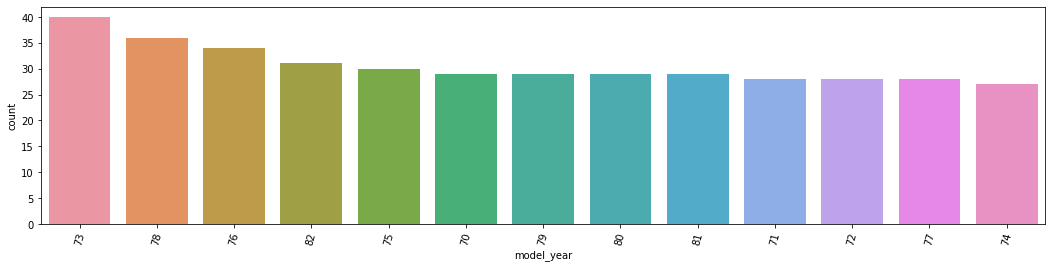

In [22]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(df_mpg['model_year'], order=df_mpg['model_year'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

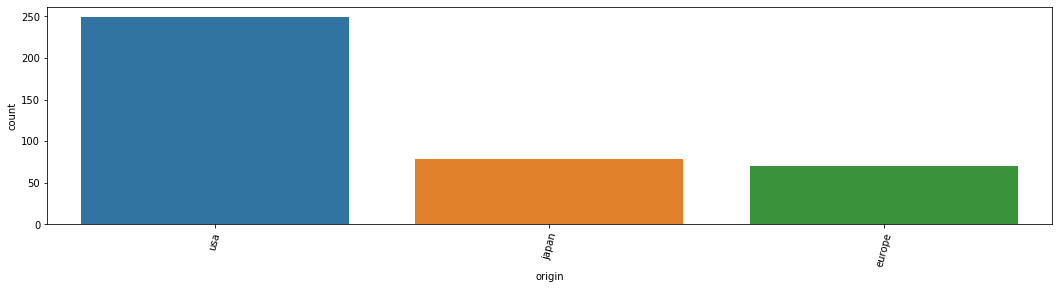

In [23]:
fig = plt.figure(1, (18, 4))

ax1 = plt.subplot(1,1,1)
sns.countplot(df_mpg['origin'], order=df_mpg['origin'].value_counts().index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=75)

plt.show()

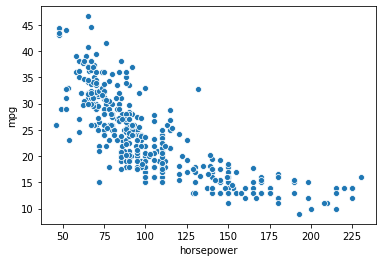

In [24]:
sns.scatterplot(x=df_mpg['horsepower'], y = df_mpg['mpg'])

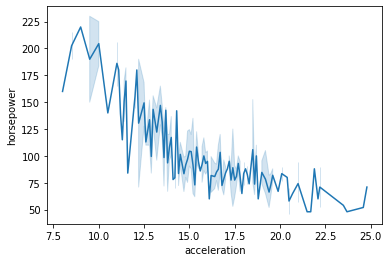

In [25]:
sns.lineplot(x=df_mpg["acceleration"], y=df_mpg["horsepower"])
             

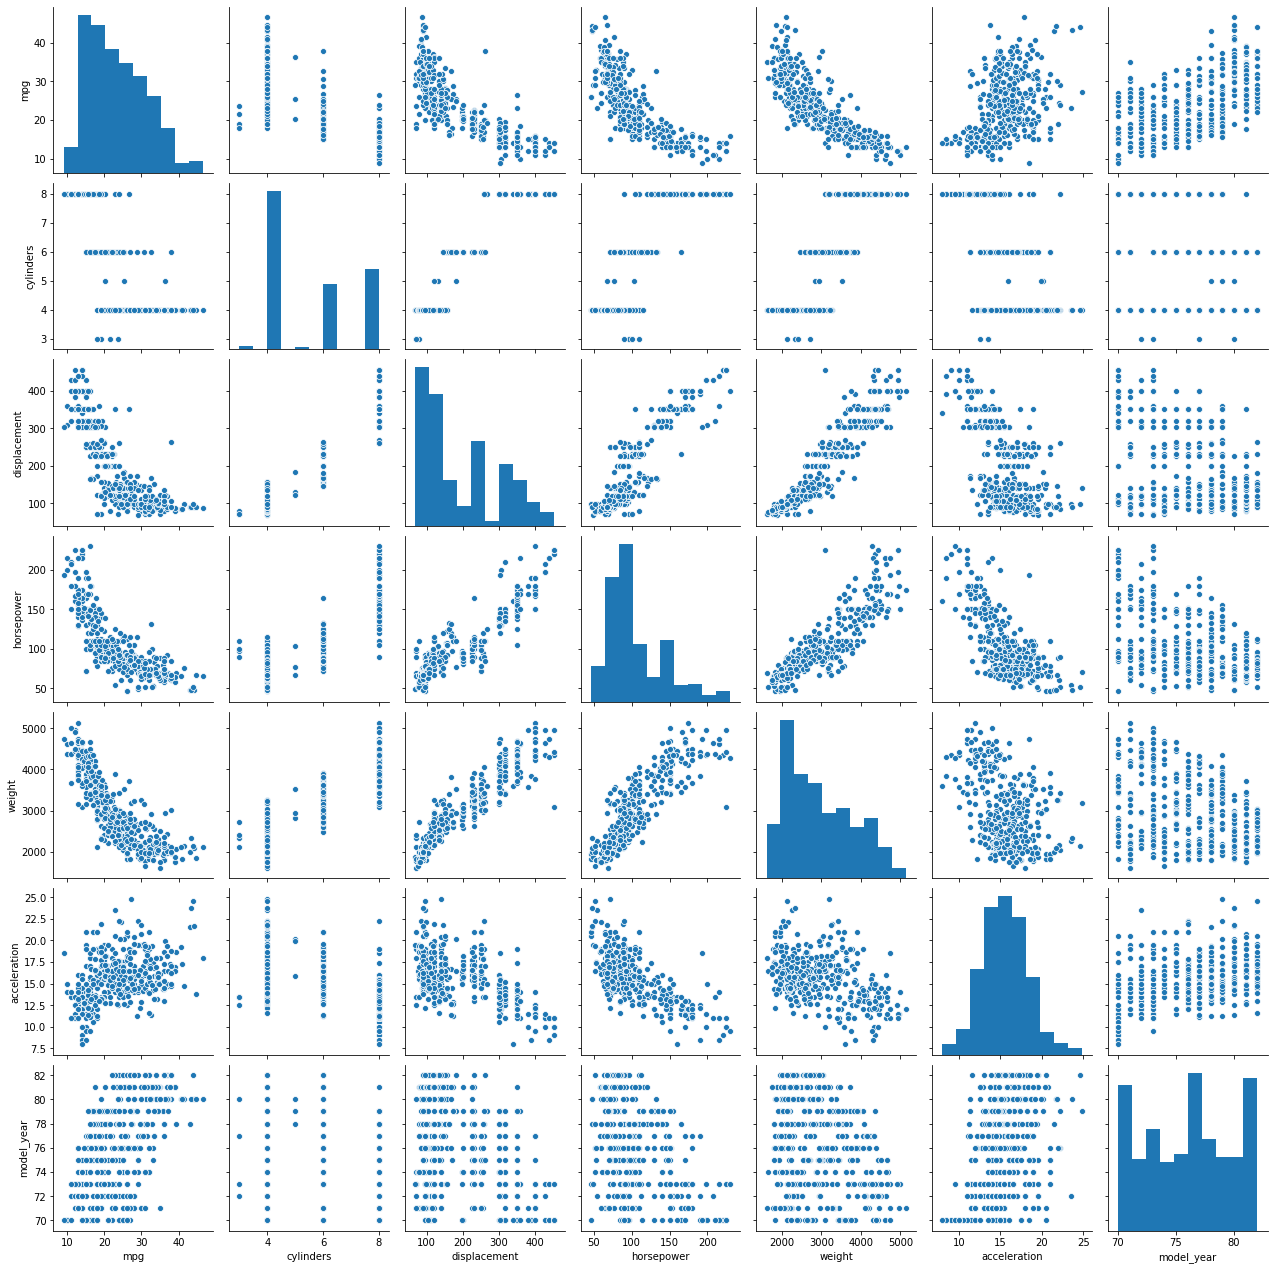

In [26]:
sns.pairplot(df_mpg)

## 9. Imagine a circle centered at (0.5, 0.5) with radius 0.4. Show 5000 random points in therectangle ((0, 1), (0, 1)); each point inside the circle should be colored green and markedwith ‘x’, while each point outside the circle should be colored red and marked with a circle.

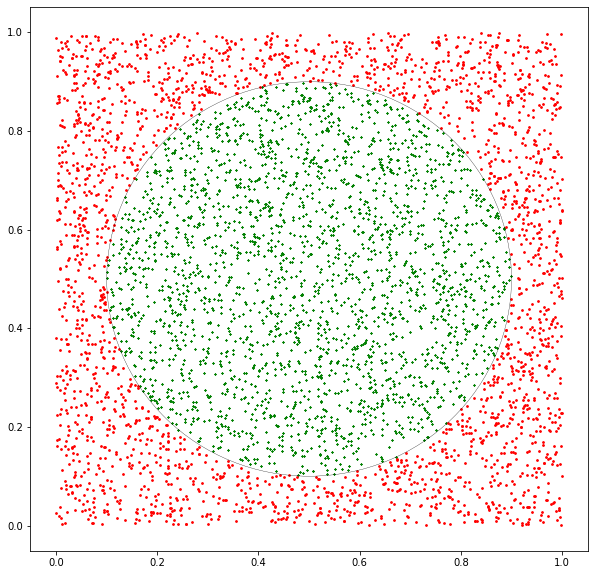

In [27]:
x_sampl = np.random.uniform(low=0, high=1, size=(5000,)) #initializing random x and y points
y_sampl = np.random.uniform(low=0, high=1, size=(5000,))
fig, ax = plt.subplots(figsize=(10,10))
radius = 0.4

insidex = []
insidey = []

outsidex = []
outsidey = []

for i in range (0,5000):
    if ((x_sampl[i] - 0.5)**2) + ((y_sampl[i] - 0.5)**2) < radius**2 :
            insidex.append(x_sampl[i])
            insidey.append(y_sampl[i])
    else:
        outsidex.append(x_sampl[i])
        outsidey.append(y_sampl[i])
        
circle2 = plt.Circle((0.5, 0.5), radius, color='black',fill=False, linewidth = 0.3)
ax.add_patch(circle2)



ax.scatter(insidex,insidey, s = 2, marker = 'x', color = 'g')
ax.scatter(outsidex, outsidey, s=3, marker = 'o', color = 'r')

## 10. Show 5000 random points in the same rectangle, colored by their distance from the point(0.7, 0.3). Note that here the distance (and therefore the color) is ​continuous​.

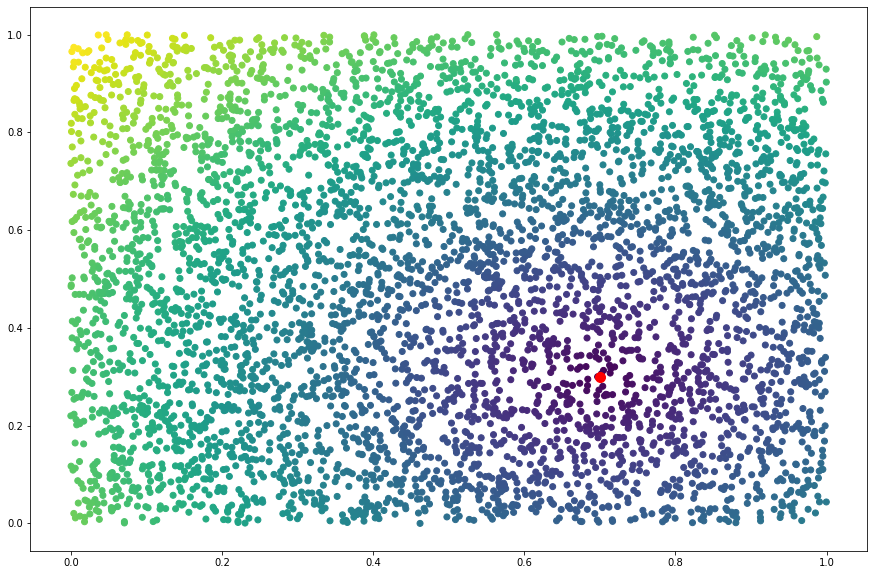

In [46]:
fig, ax = plt.subplots(figsize=(15,10))

x = np.random.random(5000)
y = np.random.random(5000)

colorspan = [np.sqrt((0.7-x[i])**2+(0.3-y[i])**2) for i in range (5000)]

ax.scatter(x,y, c = colorspan, cmap= 'viridis')
ax.scatter (0.7,0.3, color= 'r', s=100) #point of interest

## 11) Take a look at the ​matplotlib gallery​ and the ​seaborn gallery​.  

## Done 